In [1]:
import os
import tarfile
import urllib

In [2]:
import pandas as pd
HOUSING_PATH = '/content/drive/Shared drives/TNT/스터디/2020년 2학기/CV팀/1주차/데이터'
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [3]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


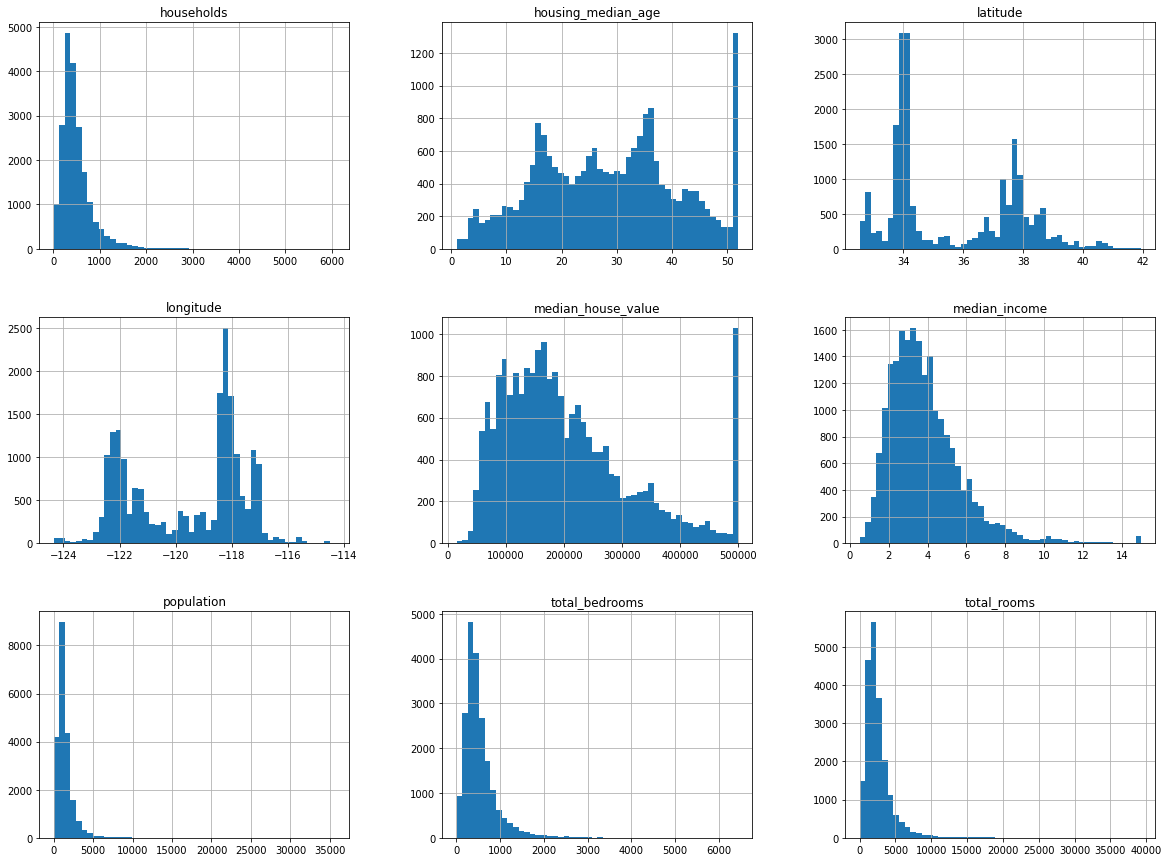

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize = (20, 15))
plt.show()

In [8]:
import numpy as np

def split_train_test(data, test_ratio):

    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
train_set, test_set = split_train_test(housing, 0.2)

In [10]:
len(train_set)

16512

In [11]:
len(test_set)

4128

In [12]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2 **32

In [13]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [14]:
housing_with_id = housing.reset_index()

train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [15]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [16]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 97)

In [17]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins = [0., 1.5, 3.0, 4.5, 6, np.inf],
                               labels = [1, 2, 3, 4, 5])

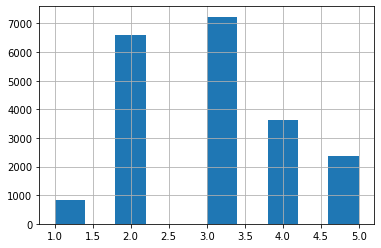

In [18]:
housing["income_cat"].hist()

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 97)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.iloc[test_index]

In [20]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [21]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
housing = strat_train_set.copy()

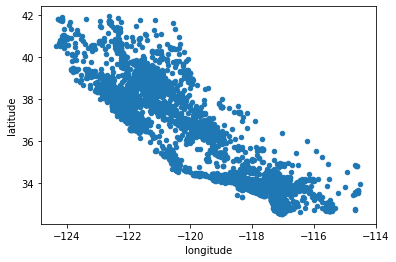

In [23]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude")

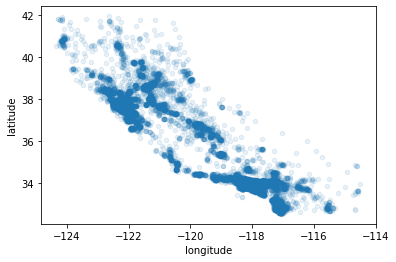

In [24]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)

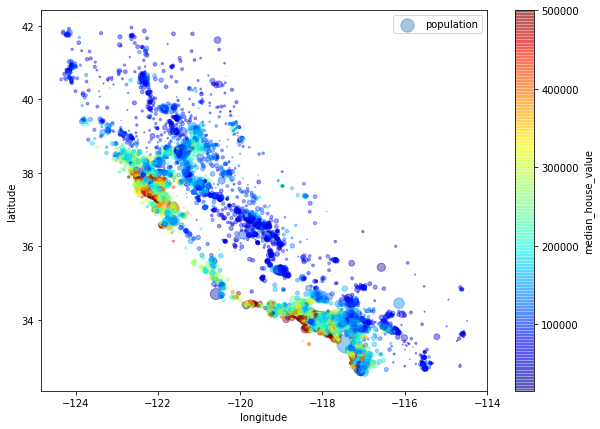

In [25]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4,
             s = housing["population"]/100, label = "population", figsize = (10, 7),
             c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True,
             sharex = False)

plt.legend()

In [26]:
corr_matrix = housing.corr()

In [27]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.690497
total_rooms           0.135766
housing_median_age    0.104196
households            0.062656
total_bedrooms        0.048285
population           -0.029843
longitude            -0.037445
latitude             -0.150342
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f159f458278>,
      dtype=object)

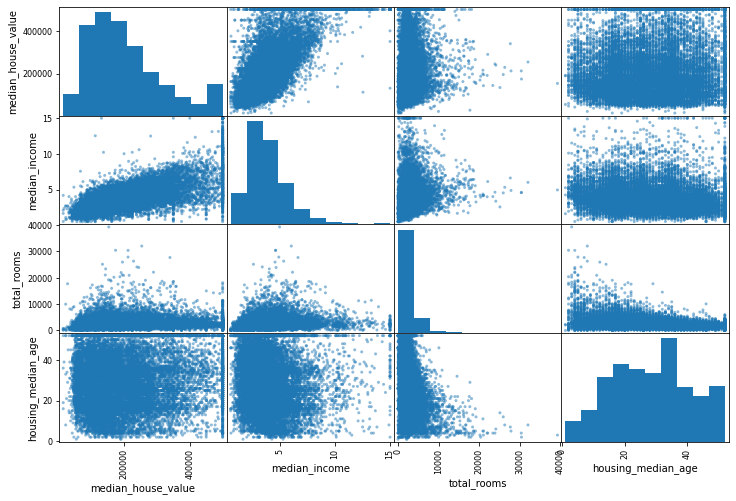

In [28]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize = (12, 8))

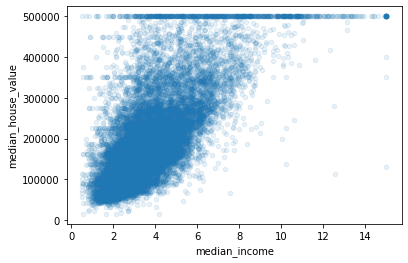

In [29]:
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value", alpha = 0.1)

In [30]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [31]:
corr_matrix = housing.corr()

In [32]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.690497
rooms_per_house             0.158425
total_rooms                 0.135766
housing_median_age          0.104196
households                  0.062656
total_bedrooms              0.048285
population_per_household   -0.026878
population                 -0.029843
longitude                  -0.037445
latitude                   -0.150342
bedrooms_per_room          -0.257212
Name: median_house_value, dtype: float64

In [33]:
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labes = strat_train_set["median_house_value"].copy()

In [34]:
# housing.dropna(subset = ["total_bedrooms"])
# housing.drop("total_bedrooms", axis = 1)
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace = True)

In [35]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")

In [36]:
housing_num = housing.drop("ocean_proximity", axis = 1)

In [37]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [38]:
imputer.statistics_

array([-118.49  ,   34.25  ,   29.    , 2125.    ,  434.    , 1168.    ,
        409.    ,    3.5313])

In [39]:
housing_num.median().values

array([-118.49  ,   34.25  ,   29.    , 2125.    ,  434.    , 1168.    ,
        409.    ,    3.5313])

In [40]:
X = imputer.transform(housing_num)

In [41]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns,
                          index = housing_num.index)

In [42]:
housing_cat = housing[["ocean_proximity"]]

In [43]:
housing_cat.head(10)

,ocean_proximity
16784,NEAR OCEAN
8520,<1H OCEAN
15697,NEAR BAY
2143,INLAND
6397,INLAND
9767,<1H OCEAN
11176,<1H OCEAN
18882,NEAR BAY
18959,INLAND
18086,<1H OCEAN


In [44]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[4.],
       [0.],
       [3.],
       [1.],
       [1.],
       [0.],
       [0.],
       [3.],
       [1.],
       [0.]])

In [45]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [46]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [47]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [48]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [49]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        rooms_per_household = X[:, population_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
                         ("imputer", SimpleImputer(strategy = "median")),
                         ("attribs_adder", CombinedAttributesAdder()),
                         ("std_scaler", StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [51]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline, num_attribs),
                                   ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [52]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labes)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
some_data = housing.iloc[:5]
some_labels = housing_labes.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("예측:", lin_reg.predict(some_data_prepared))

예측: [222680.50491222 179797.5516593  523129.78636995 108662.2863346
 219934.75805264]


In [74]:
print("레이블:", list(some_labels))

레이블: [87500.0, 163900.0, 500001.0, 70700.0, 276200.0]


In [75]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labes, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [76]:
lin_rmse

68439.19422385715

In [77]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labes)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [78]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labes, housing_predictions)
tree_mse = np.sqrt(tree_mse)

In [79]:
tree_mse

0.0

In [80]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labes,
                         scoring = "neg_mean_squared_error", cv = 10)

tree_rmse_scores = np.sqrt(-scores)

In [81]:
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준편차", scores.std())

In [82]:
display_scores(tree_rmse_scores)

점수: [72711.11934858 70869.59037978 70813.22006147 68816.16016147
 73417.75641682 71175.52359812 67579.93829088 72832.23466201
 73087.67234948 71190.50827951]
평균: 71249.37235481123
표준편차 1801.4450695272094


In [83]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labes,
                             scoring = "neg_mean_squared_error", cv = 10)

In [84]:
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수: [70516.96019929 68238.85105334 66505.48973081 67279.70411346
 66680.2569818  69768.77995018 71811.56429336 70997.46516855
 68620.88949454 66380.98832118]
평균: 68680.09493065075
표준편차 1894.968626609455


In [85]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labes)
housing_predictions = forest_reg.predict(housing_prepared)
forest_rmse = np.sqrt(mean_squared_error(housing_labes, housing_predictions))

In [86]:
forest_rmse

18647.65284493663

In [87]:
foreset_scores = cross_val_score(forest_reg, housing_prepared, housing_labes,
                             scoring = "neg_mean_squared_error", cv = 10)
forest_rmse_scores = np.sqrt(-foreset_scores)
display(forest_rmse_scores)

array([49856.87387736, 50760.03885689, 50697.07540162, 47966.97487444,
       50451.06634216, 50788.39891763, 49316.07245401, 52872.45345562,
       50100.48251663, 51998.92071509])

In [88]:
from sklearn.model_selection import GridSearchCV

param_grid = [
              {"n_estimators": [3, 10, 30], 'max_features' : [2, 4, 6, 8]},
              {"bootstrap": [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

In [89]:
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,
                           scoring = "neg_mean_squared_error",
                           return_train_score = True)

grid_search.fit(housing_prepared, housing_labes)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [90]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [91]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [92]:
cvres = grid_search.cv_results_

In [93]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63867.60826158329 {'max_features': 2, 'n_estimators': 3}
55592.8477569982 {'max_features': 2, 'n_estimators': 10}
52565.99532075366 {'max_features': 2, 'n_estimators': 30}
60645.200869233086 {'max_features': 4, 'n_estimators': 3}
53290.14774910979 {'max_features': 4, 'n_estimators': 10}
50736.13475280606 {'max_features': 4, 'n_estimators': 30}
60292.98854456741 {'max_features': 6, 'n_estimators': 3}
52664.70430160323 {'max_features': 6, 'n_estimators': 10}
50623.08587654942 {'max_features': 6, 'n_estimators': 30}
59754.294107506925 {'max_features': 8, 'n_estimators': 3}
53204.47141719403 {'max_features': 8, 'n_estimators': 10}
51009.34526430604 {'max_features': 8, 'n_estimators': 30}
63090.74590537463 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53872.94169141805 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59770.89859427547 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52345.74016356585 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [94]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [95]:
feature_importances

array([7.34009599e-02, 7.09219912e-02, 4.11869882e-02, 2.04546449e-02,
       1.68747078e-02, 1.73977700e-02, 1.64196770e-02, 3.10893630e-01,
       6.84585004e-02, 6.91068042e-02, 9.71013084e-02, 1.03326364e-02,
       1.80710844e-01, 5.21630139e-05, 2.63547436e-03, 4.05190024e-03])

In [100]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoer = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [101]:
sorted(zip(feature_importances, attributes), reverse = True)

[(0.31089362996642356, 'median_income'),
 (0.1807108440033232, 'INLAND'),
 (0.09710130836121417, 'bedrooms_per_room'),
 (0.07340095991708981, 'longitude'),
 (0.07092199122819452, 'latitude'),
 (0.06910680423274657, 'pop_per_hhold'),
 (0.0684585004284875, 'rooms_per_hhold'),
 (0.04118698824051694, 'housing_median_age'),
 (0.020454644882027025, 'total_rooms'),
 (0.01739776997112726, 'population'),
 (0.01687470778579911, 'total_bedrooms'),
 (0.016419676965461066, 'households'),
 (0.010332636408549128, '<1H OCEAN'),
 (0.004051900238966625, 'NEAR OCEAN'),
 (0.002635474356203444, 'NEAR BAY'),
 (5.2163013870135165e-05, 'ISLAND')]

In [ ]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis = 1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                       loc = squared_errors.mean(),
                       scale = stats.sem(squared_errors)))

array([46987.4735832 , 51347.26035874])

#연습문제

1

In [61]:
param_grid = [
              {"kernel": ['linear', 'rbf']}, {"C" : [1, 1.5]} , {'gamma' : ['scale', 'auto']} 
]

In [62]:
from sklearn.svm import SVR
svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv = 5,
                           scoring = "neg_mean_squared_error",
                           return_train_score = True)

grid_search.fit(housing_prepared, housing_labes)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'kernel': ['linear', 'rbf']}, {'C': [1, 1.5]},
                         {'gamma': ['scale', 'auto']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [63]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

112310.30112009127

In [67]:
grid_search.best_estimator_

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

2.

In [70]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal


param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000), #로그 분포 분포
        'gamma': expon(scale=1.0), #지수 분포
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=5, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=97)
rnd_search.fit(housing_prepared, housing_labes)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=44545.77229231502, gamma=3.514450695004778, kernel=rbf ........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=44545.77229231502, gamma=3.514450695004778, kernel=rbf, total=  46.8s
[CV] C=44545.77229231502, gamma=3.514450695004778, kernel=rbf ........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   46.8s remaining:    0.0s


[CV]  C=44545.77229231502, gamma=3.514450695004778, kernel=rbf, total=  46.9s
[CV] C=44545.77229231502, gamma=3.514450695004778, kernel=rbf ........
[CV]  C=44545.77229231502, gamma=3.514450695004778, kernel=rbf, total=  49.2s
[CV] C=44545.77229231502, gamma=3.514450695004778, kernel=rbf ........
[CV]  C=44545.77229231502, gamma=3.514450695004778, kernel=rbf, total=  50.9s
[CV] C=44545.77229231502, gamma=3.514450695004778, kernel=rbf ........
[CV]  C=44545.77229231502, gamma=3.514450695004778, kernel=rbf, total=  46.7s
[CV] C=62.89697875721708, gamma=0.6231929121339922, kernel=linear ....
[CV]  C=62.89697875721708, gamma=0.6231929121339922, kernel=linear, total=   9.9s
[CV] C=62.89697875721708, gamma=0.6231929121339922, kernel=linear ....
[CV]  C=62.89697875721708, gamma=0.6231929121339922, kernel=linear, total=   9.8s
[CV] C=62.89697875721708, gamma=0.6231929121339922, kernel=linear ....
[CV]  C=62.89697875721708, gamma=0.6231929121339922, kernel=linear, total=  10.1s
[CV] C=62.896978

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  8.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=5, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f15906bb550>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f15906bb710>,
                                        'kernel': ['linear', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=97, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=2)

3.

In [71]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:]) #큰 값을 K뽑아 오른쪽에 넣고 이들만 sorting에서 출력

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k

    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self

    def transform(self, X):
        return X[:, self.feature_indices_]

In [96]:
k = 5
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  1,  7, 10, 12])

In [102]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'latitude', 'median_income', 'bedrooms_per_room',
       'INLAND'], dtype='<U18')

In [103]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.31089362996642356, 'median_income'),
 (0.1807108440033232, 'INLAND'),
 (0.09710130836121417, 'bedrooms_per_room'),
 (0.07340095991708981, 'longitude'),
 (0.07092199122819452, 'latitude')]

In [104]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [105]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)

In [106]:
housing_prepared_top_k_features[0:3]

array([[-1.43888329,  0.96326582, -0.42409373, -0.02481543,  0.        ],
       [ 0.61935429, -0.81024409, -0.6613364 ,  1.29820809,  0.        ],
       [-1.43888329,  1.01006028,  3.57732246, -0.99825138,  0.        ]])

In [107]:
housing_prepared[0:3, top_k_feature_indices]

array([[-1.43888329,  0.96326582, -0.42409373, -0.02481543,  0.        ],
       [ 0.61935429, -0.81024409, -0.6613364 ,  1.29820809,  0.        ],
       [-1.43888329,  1.01006028,  3.57732246, -0.99825138,  0.        ]])

4.

In [108]:
prepare_select_and_predict_pipeline = Pipeline([
    
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])

In [110]:
prepare_select_and_predict_pipeline.fit(housing, housing_labes)

Pipeline(memory=None,
         steps=[('preparation',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                              

In [113]:
some_data = housing.iloc[:4]
some_labels = housing_labes.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [187459.70507132 171395.81113092 469985.07248637  90725.8332477 ]
Labels:		 [87500.0, 163900.0, 500001.0, 70700.0]


5.

In [115]:
param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(housing, housing_labes)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] feature_selection__k=1, preparation__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  feature_selection__k=1, preparation__num__imputer__strategy=mean, total=   7.6s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.6s remaining:    0.0s


[CV]  feature_selection__k=1, preparation__num__imputer__strategy=mean, total=   7.8s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=1, preparation__num__imputer__strategy=mean, total=   7.8s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=1, preparation__num__imputer__strategy=mean, total=   8.0s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=1, preparation__num__imputer__strategy=mean, total=   7.9s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=1, preparation__num__imputer__strategy=median, total=   7.8s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=1, preparation__num__imputer__strategy=median, total=   7.9s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=1, preparation__num__

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 34.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preparation',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                     